# Birth Rate Analysis

### Data Science Project for Beginners on Birth Rate Analysis with Python.

Let’s take a look at the freely available data on births in the United States, provided by the Centers for Disease Control (CDC). This data can be found at births.csv

# Import Necessary Library

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import plotly.express as px

%matplotlib inline

# Data Collaction

In [243]:
data = pd.read_csv("data/births.csv")
data.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


# Data Pre-processing

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [245]:
data.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [246]:
data.columns

Index(['year', 'month', 'day', 'gender', 'births'], dtype='object')

### Let's have a look is there any null values or Missing data in this dataset

In [247]:
data.isnull()

,year,month,day,gender,births
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
15542,False,False,True,False,False
15543,False,False,True,False,False
15544,False,False,True,False,False
15545,False,False,True,False,False


In [248]:
data.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [249]:
data.isnull().sum().sum()

480

## So there is some missing values lets remove it

In [250]:
data.dropna()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15062,1988,12,29.0,M,5944
15063,1988,12,30.0,F,5742
15064,1988,12,30.0,M,6095
15065,1988,12,31.0,F,4435


In [251]:
data['decade'] = 10 * (data['year'] // 10)
data.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


We immediately see that male births outnumber female births in every decade. To see this trend a bit more clearly, we can use the built-in plotting tools in Pandas to visualize the total number of births by year

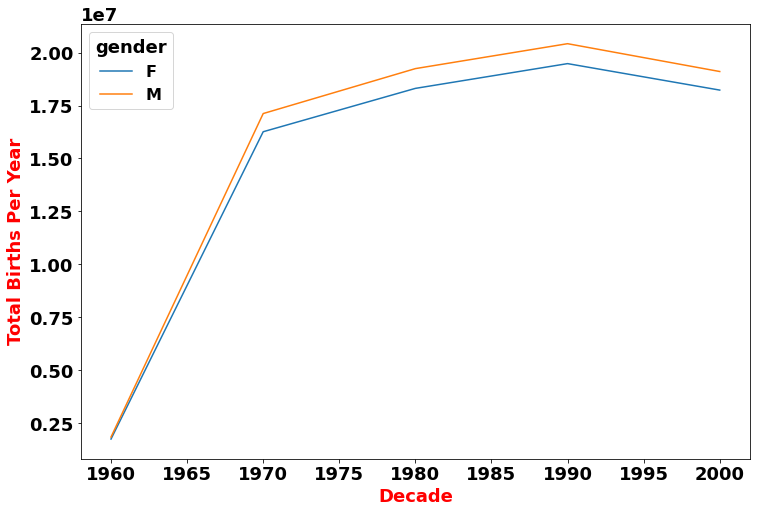

In [262]:
brith_decade = data.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
brith_decade.plot(figsize=(12,8))
plt.xlabel("Decade", fontsize=18, weight="bold", color="red")
plt.ylabel("Total Births Per Year", fontsize=18, weight="bold", color="red")
plt.rc("font", size=18)
plt.show()

# Further data exploration

There are a few interesting features we can pull out of this dataset using the Pandas tools. We must start by cleaning the data a bit, removing outliers caused by mistyped dates or missing values. One easy way to remove these all at once is to cut outliers, we’ll do this via a robust sigma-clipping operation

In [253]:
quartiles = np.percentile(data['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution. With this we can use the query() method to filter out rows with births outside these values

In [254]:
births = data.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek


C:\Users\User\AppData\Local\Temp\ipykernel_5672\456905144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['day'] = births['day'].astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_5672\456905144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['dayofweek'] = births.index.dayofweek


Using this we can plot births by weekday for several decades

C:\Users\User\AppData\Local\Temp\ipykernel_5672\1470779013.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


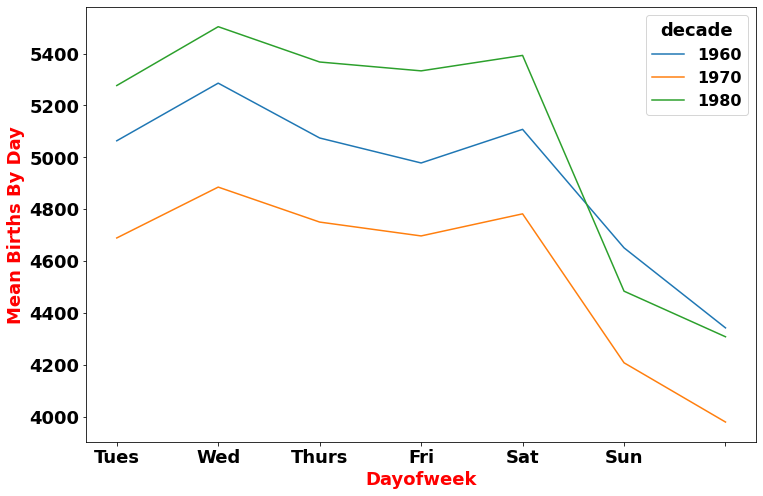

In [256]:
births.pivot_table('births', index='dayofweek',
                   columns='decade', aggfunc='mean').plot(figsize=(12,8))
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Dayofweek', fontsize=18, color="red", weight="bold")
plt.ylabel('Mean Births By Day', fontsize=18, color="red", weight="bold")
plt.rc("font", size=18)
plt.rc("legend", fontsize=16)
# plt.rc("axes", labelsize=50)
plt.show()

#me

Apparently births are slightly less common on weekends than on weekdays! Note that the 1990s and 2000s are missing because the CDC data contains only the month of birth starting in 1989.

Another interesting view is to plot the mean number of births by the day of the year. Let’s first group the data by month and day separately

In [261]:
births_month = births.pivot_table(
    'births', [births.index.month, births.index.day])
print(births_month.head())

births_month.index = [pd.datetime(2012, month, day)
                      for (month, day) in births_month.index]
births_month.head()

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625


C:\Users\User\AppData\Local\Temp\ipykernel_5672\824959721.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_month.index = [pd.datetime(2012, month, day)


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


Focusing on the month and day only, we now have a time series reflecting the average number of births by date of the year. From this, we can use the plot method to plot the data. It reveals some interesting trends

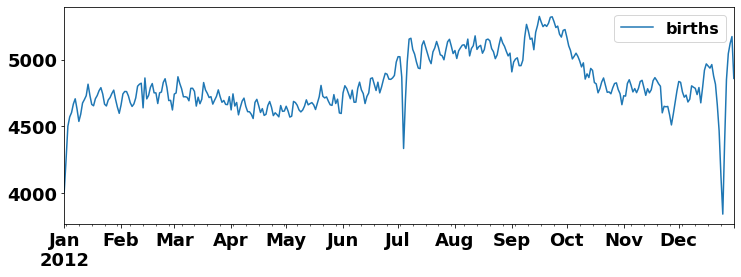

In [263]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()

# Sheikh Rasel Ahmed

#### Data Science || Machine Learning || Deep Learning || Artificial Intelligence Enthusiast

###### LinkedIn - https://www.linkedin.com/in/shekhnirob1
###### GitHub - https://github.com/Rasel1435
###### Behance - https://www.behance.net/Shekhrasel2513